In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("landslide_detection_dataset.csv")

In [7]:
# Step 2: Drop non-numeric and non-useful columns
df = df.drop(columns=["Date"])  # 'Date' won't help directly in this model


In [9]:
# Step 3: Encode categorical columns
label_encoders = {}
categorical_cols = ["Rock_Type", "Soil_Type"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:
X = df.drop(columns=["Landslide_Occurrence"])
y = df["Landslide_Occurrence"]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [15]:
# Step 6: Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [17]:
# Step 7: Predict and Evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


In [19]:
# Step 8: Display results
print("✅ Accuracy of Random Forest Classifier:", round(accuracy * 100, 2), "%")
print("\n📊 Classification Report:\n", report)

✅ Accuracy of Random Forest Classifier: 99.7 %

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1479
           1       1.00      0.99      0.99       521

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000



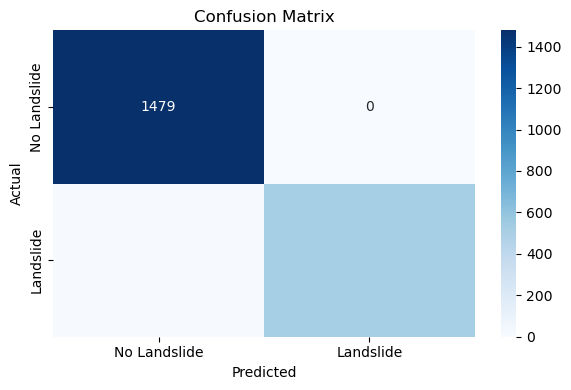

In [21]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Landslide", "Landslide"],
            yticklabels=["No Landslide", "Landslide"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

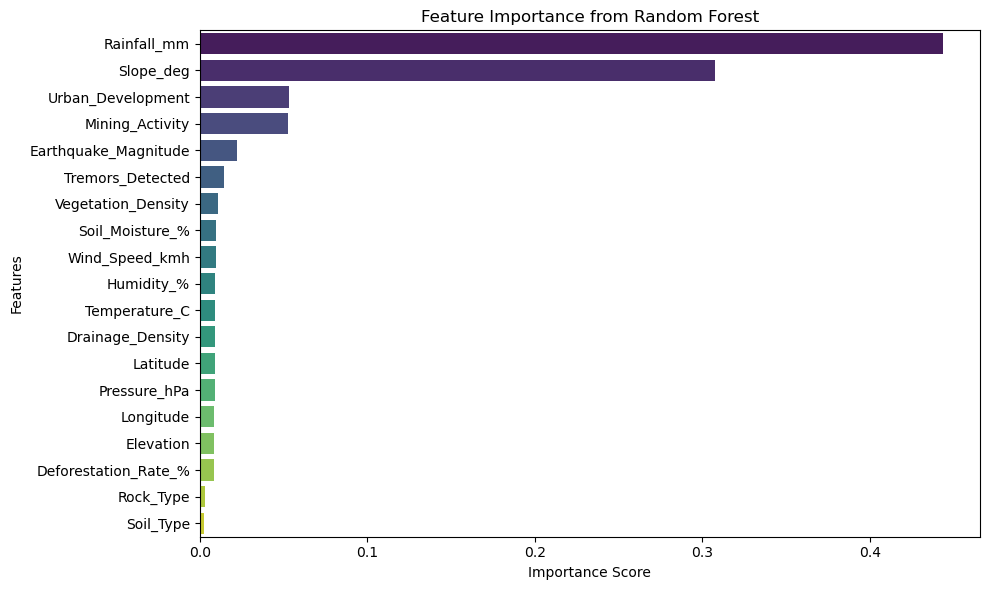

In [23]:
# Feature Importance Plot
importances = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


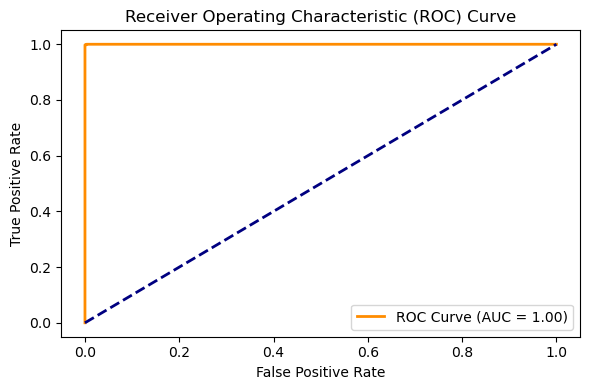

In [25]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_proba = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [27]:
import pickle

# Save the trained model
with open("landslide_model.pkl", "wb") as f:
    pickle.dump(rf, f)
